### **Import libraries and download dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# download the data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-12 12:47:48--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.05s   

2025-10-12 12:47:48 (1.42 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [2]:
# load csv file
lead_df = pd.read_csv('course_lead_scoring.csv')
print(lead_df.shape)
lead_df.head()

(1462, 9)


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [4]:
lead_df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


### **Data Preparation: Missing values**

In [5]:
# select categorical variables
categorical_cols = lead_df.dtypes[lead_df.dtypes == 'object'].index.to_list()
print(categorical_cols)

# select numerical cols
numerical_cols = lead_df.dtypes[lead_df.dtypes != 'object'].index.to_list()
print(numerical_cols)

['lead_source', 'industry', 'employment_status', 'location']
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']


In [6]:
# check for missing values
lead_df[categorical_cols].isnull().sum()

lead_source          128
industry             134
employment_status    100
location              63
dtype: int64

In [7]:
# replace missing values in categorical cols with 'NA'
lead_df[categorical_cols] = lead_df[categorical_cols].fillna('NA')
lead_df[categorical_cols].isnull().sum()

lead_source          0
industry             0
employment_status    0
location             0
dtype: int64

In [8]:
lead_df[numerical_cols].isnull().sum()

number_of_courses_viewed      0
annual_income               181
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [9]:
lead_df[numerical_cols] = lead_df[numerical_cols].fillna(0.0)
lead_df[numerical_cols].isnull().sum()

number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### **Q1: Most frequent observation**

In [10]:
lead_df[categorical_cols]['industry'].mode()

0    retail
Name: industry, dtype: object

### **Q2: Correlation Matrix**

<Axes: >

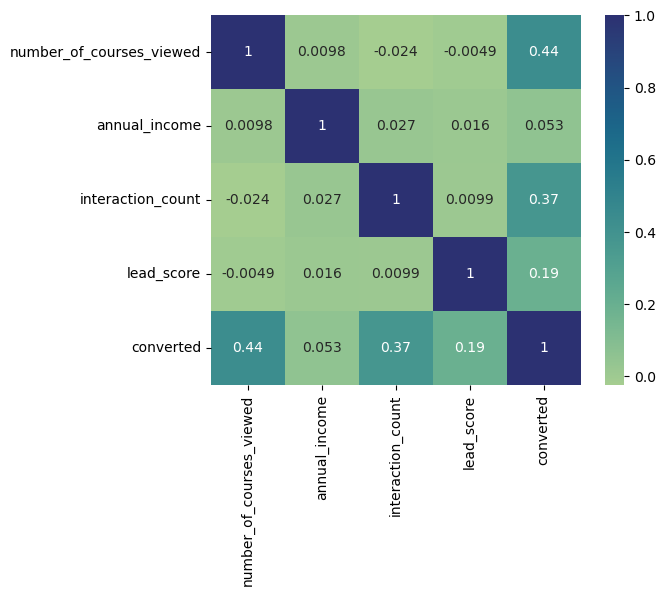

In [11]:
# correlation for numerical cols
sns.heatmap(
    lead_df[numerical_cols].corr(),
    annot=True,
    square=True,
    fmt=".2g",
    cmap='crest'
)

In [12]:
# check correlation with converted column (target variable)
lead_df[numerical_cols].corrwith(lead_df['converted'])


number_of_courses_viewed    0.435914
annual_income               0.053131
interaction_count           0.374573
lead_score                  0.193673
converted                   1.000000
dtype: float64

In [13]:
lead_df.converted.value_counts()

converted
1    905
0    557
Name: count, dtype: int64

In [16]:
lead_df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### **Split the data**

In [18]:
from sklearn.model_selection import train_test_split

X = lead_df.drop('converted', axis=1)
y = lead_df['converted']

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42, stratify=y_full_train)

len(X_train), len(y_val), len(y_test), len(X_test), len(y_train)

(876, 293, 293, 293, 876)

In [20]:
X_full_train.shape

(1169, 8)

In [21]:
X_train.shape

(876, 8)

In [22]:
y_train.shape

(876,)

### **Q3: Mutual information**

In [37]:
from sklearn.metrics import mutual_info_score

def mutual_converted_score(series):
    return mutual_info_score(series, y_train.values)

In [38]:
mi_score = X_train[categorical_cols].apply(mutual_converted_score)
mi_score.round(2).sort_values(ascending=False)

lead_source          0.03
industry             0.01
employment_status    0.01
location             0.00
dtype: float64

In [39]:
X_train.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
dtype: object

### **Q4: Train Logistic Regression Model**

In [32]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [40]:
X_train_dicts = X_train.to_dict(orient='records')
X_train_dicts

[{'lead_source': 'social_media',
  'industry': 'other',
  'number_of_courses_viewed': 4,
  'annual_income': 53556.0,
  'employment_status': 'self_employed',
  'location': 'africa',
  'interaction_count': 2,
  'lead_score': 0.18},
 {'lead_source': 'referral',
  'industry': 'healthcare',
  'number_of_courses_viewed': 3,
  'annual_income': 66872.0,
  'employment_status': 'unemployed',
  'location': 'NA',
  'interaction_count': 3,
  'lead_score': 0.03},
 {'lead_source': 'events',
  'industry': 'healthcare',
  'number_of_courses_viewed': 3,
  'annual_income': 60375.0,
  'employment_status': 'student',
  'location': 'australia',
  'interaction_count': 9,
  'lead_score': 0.3},
 {'lead_source': 'NA',
  'industry': 'manufacturing',
  'number_of_courses_viewed': 3,
  'annual_income': 51271.0,
  'employment_status': 'unemployed',
  'location': 'europe',
  'interaction_count': 3,
  'lead_score': 0.6},
 {'lead_source': 'social_media',
  'industry': 'healthcare',
  'number_of_courses_viewed': 1,
  '

In [41]:
X_val_dicts = X_val.to_dict(orient='records')
X_val_dicts

[{'lead_source': 'referral',
  'industry': 'other',
  'number_of_courses_viewed': 3,
  'annual_income': 68815.0,
  'employment_status': 'employed',
  'location': 'north_america',
  'interaction_count': 3,
  'lead_score': 0.49},
 {'lead_source': 'referral',
  'industry': 'education',
  'number_of_courses_viewed': 3,
  'annual_income': 30134.0,
  'employment_status': 'self_employed',
  'location': 'africa',
  'interaction_count': 2,
  'lead_score': 0.65},
 {'lead_source': 'events',
  'industry': 'finance',
  'number_of_courses_viewed': 1,
  'annual_income': 58741.0,
  'employment_status': 'unemployed',
  'location': 'south_america',
  'interaction_count': 0,
  'lead_score': 0.73},
 {'lead_source': 'social_media',
  'industry': 'manufacturing',
  'number_of_courses_viewed': 2,
  'annual_income': 80946.0,
  'employment_status': 'student',
  'location': 'asia',
  'interaction_count': 3,
  'lead_score': 0.56},
 {'lead_source': 'NA',
  'industry': 'healthcare',
  'number_of_courses_viewed': 3

In [43]:
# one-hot encode categorical variables
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(X_train_dicts)
X_val = dv.transform(X_val_dicts)

X_train.shape, X_val.shape

((876, 31), (293, 31))

In [44]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [45]:
lr = LogisticRegression(solver='liblinear', 
                        C=1.0, max_iter=1000, random_state=42
                        )
lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [46]:
y_pred_val = lr.predict_proba(X_val)[:, 1]
y_pred_val

array([0.74645226, 0.81416811, 0.31794189, 0.58740274, 0.82231413,
       0.64254473, 0.94167913, 0.89118017, 0.49280362, 0.94964534,
       0.59975436, 0.57544376, 0.52997578, 0.43705687, 0.37475803,
       0.54371926, 0.73615221, 0.60356264, 0.68794495, 0.68776116,
       0.64435933, 0.27160437, 0.84598861, 0.55199977, 0.33954658,
       0.65007069, 0.64781974, 0.76366663, 0.8612639 , 0.60497688,
       0.91245603, 0.54640101, 0.53888765, 0.4108565 , 0.53433193,
       0.70961039, 0.43878405, 0.38741853, 0.5066231 , 0.60241997,
       0.62928537, 0.57431029, 0.74248838, 0.58910258, 0.50774358,
       0.77653447, 0.61235417, 0.6404787 , 0.45571722, 0.70174573,
       0.60580224, 0.61545418, 0.68840752, 0.94253144, 0.6690305 ,
       0.55985645, 0.82319535, 0.66807855, 0.347047  , 0.85306122,
       0.51414562, 0.80207938, 0.87703378, 0.51103437, 0.58961146,
       0.88107519, 0.63028121, 0.67105788, 0.9203813 , 0.4399242 ,
       0.76074385, 0.70797328, 0.78963507, 0.64702728, 0.70567

In [49]:
conversion = (y_pred_val >= 0.5)
accuracy = (y_val == conversion).mean()
accuracy.round(2)

np.float64(0.73)

### **Q5: Feature Elimination**


We’ll reproduce the same preprocessing and model from Q4, then perform leave-one-feature-out elimination:
- Get the baseline validation accuracy from using all the features.
- For each original column, drop it, re-fit DictVectorizer and LogisticRegression on train, evaluate on val, and record accuracy.

Notes:
- We re-fit the vectorizer each time because one-hot feature spaces change when a column is removed.
- We keep the same random_state, solver, and C as in Q4 for consistency.
- Use the original column list before encoding (not one-hot names).

In [69]:
baseline_acc = accuracy
# Use the original dataframe columns before encoding
all_features = [c for c in X_full_train.columns]

# Recreate train/val split deterministically (same as earlier)
X_train_lof, X_val_lof, y_train_lof, y_val_lof = train_test_split(
    X_full_train, y_full_train, test_size=0.25, random_state=42, stratify=y_full_train
)

# Helper to train and evaluate with a given set of columns
def train_eval(cols):
    X_tr = X_train_lof[cols]
    X_v  = X_val_lof[cols]

    # DictVectorizer + LogisticRegression as in Q4
    dv_local = DictVectorizer(sparse=False)
    X_tr_dict = X_tr.to_dict(orient='records')
    X_v_dict  = X_v.to_dict(orient='records')

    Xtr_enc = dv_local.fit_transform(X_tr_dict)
    Xv_enc  = dv_local.transform(X_v_dict)

    lr_local = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    lr_local.fit(Xtr_enc, y_train_lof)

    yv_pred = lr_local.predict_proba(Xv_enc)[:, 1]
    acc = (y_val_lof == (yv_pred >= 0.5)).mean()
    return float(acc)

# Evaluate removing each feature
results = []
for col in all_features:
    cols_minus_one = [c for c in all_features if c != col]
    acc = train_eval(cols_minus_one)
    results.append((col, acc, acc - baseline_acc))  # (feature, accuracy, delta_vs_baseline)

# Sort by accuracy (ascending) and show
results_sorted = sorted(results, key=lambda x: x[1])

print(f"Baseline accuracy (all features): {baseline_acc:.4f}")
print("\nAccuracy without each feature (lowest first):")
for feat, acc, delta in results_sorted:
    print(f"- drop '{feat}': acc={acc:.4f}  delta={delta:.4f}")

least_useful = results_sorted[0]

Baseline accuracy (all features): 0.7304

Accuracy without each feature (lowest first):
- drop 'interaction_count': acc=0.6177  delta=-0.1126
- drop 'number_of_courses_viewed': acc=0.6212  delta=-0.1092
- drop 'industry': acc=0.7304  delta=0.0000
- drop 'location': acc=0.7304  delta=0.0000
- drop 'lead_score': acc=0.7304  delta=0.0000
- drop 'employment_status': acc=0.7338  delta=0.0034
- drop 'lead_source': acc=0.7372  delta=0.0068
- drop 'annual_income': acc=0.8635  delta=0.1331


### **Q6: Regularized logistic regression**

In [68]:
C = [0.01, 0.1, 1, 10, 100]

for c in C:
    print(f"Training model with C={c}")
    lr = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    acc = (y_val == y_pred).mean()
    print(f"Validation accuracy: {acc:.3f}")
    print()


Training model with C=0.01
Validation accuracy: 0.734

Training model with C=0.1
Validation accuracy: 0.730

Training model with C=1
Validation accuracy: 0.730

Training model with C=10
Validation accuracy: 0.730

Training model with C=100
Validation accuracy: 0.730

